# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [546]:
#import requred packages
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import scipy.cluster.hierarchy as sch

#read in the data
data = pd.read_csv('/Users/skylerwilson/Desktop/Lighthouse_labs/Projects/unsupervised_learning_project/Data/Wholesale_Data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [547]:
data[['Channel', 'Region']] = data[['Channel', 'Region']].astype('int8') #for memory purposes

In [548]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int8 
 1   Region            440 non-null    int8 
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(6), int8(2)
memory usage: 21.6 KB


In [549]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [550]:
data.value_counts()

Channel  Region  Fresh  Milk   Grocery  Frozen  Detergents_Paper  Delicassen
1        1       514    8323   6869     529     93                1040          1
         3       43088  2100   2609     1200    1107              823           1
2        1       1073   9679   15445    61      5980              1265          1
                 572    9763   22182    2221    4882              2563          1
                 18     7504   15205    1285    4797              6372          1
                                                                               ..
1        3       4446   906    1238     3576    153               1014          1
                 4420   5139   2661     8872    1321              181           1
                 4020   3234   1498     2395    264               255           1
                 3884   3801   1641     876     397               4829          1
2        3       44466  54259  55571    7782    24171             6465          1
Length: 440, dtype: i

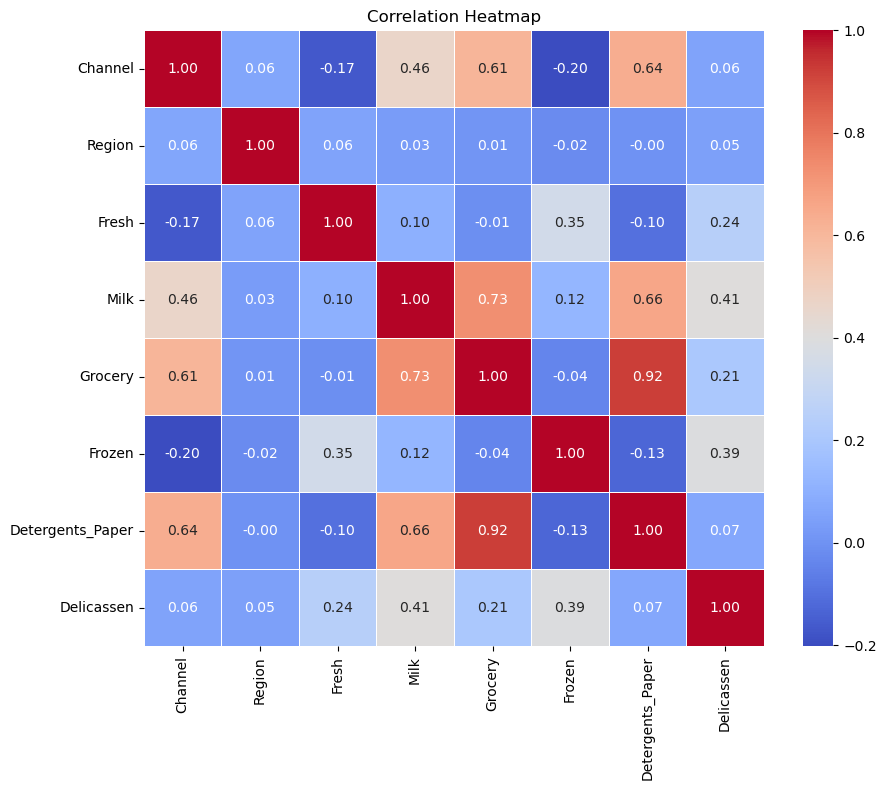

In [551]:
corr_matrix = data.corr()
# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

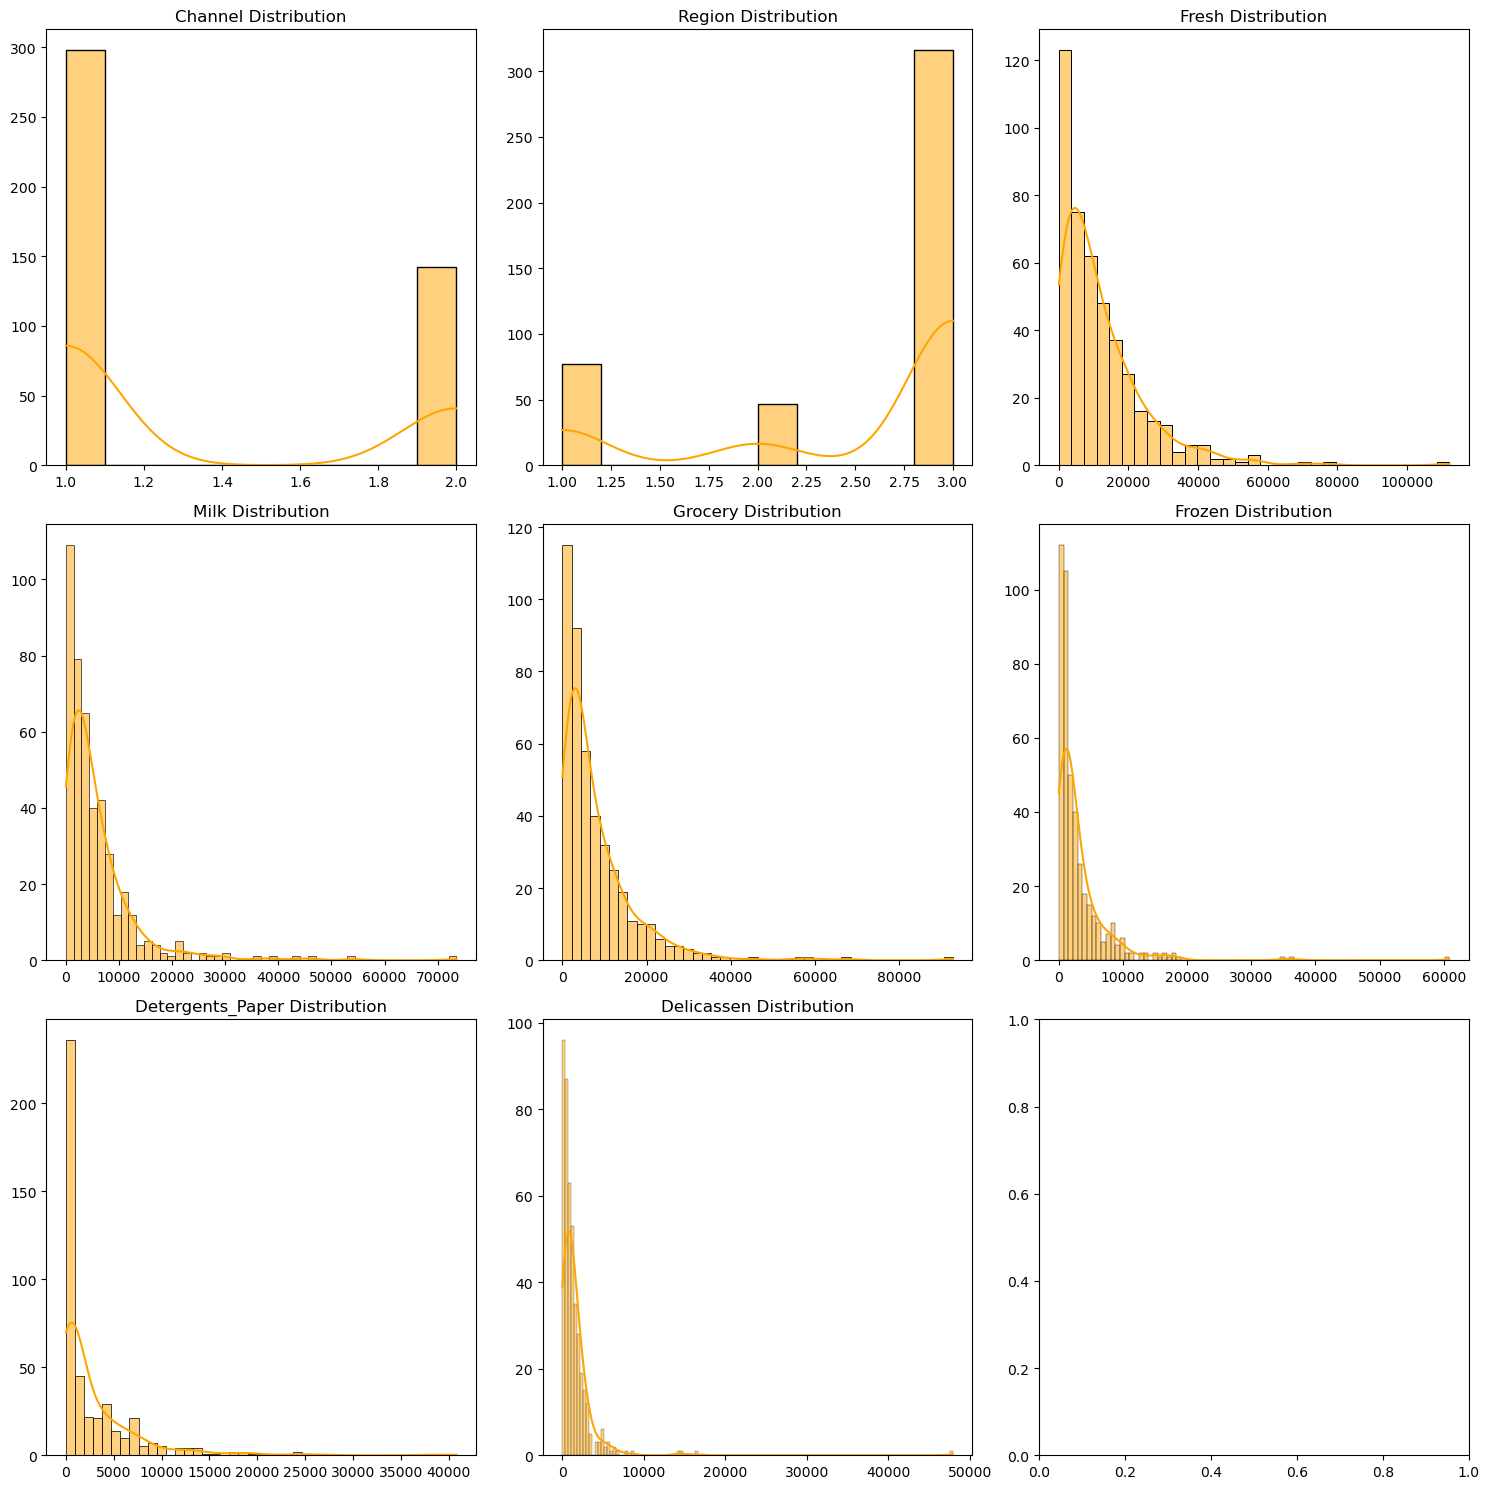

In [552]:
#iteratively check the distribution of each variable using a histogram after imputation
cols = data.columns
#get number of rows with 2 plots / column
num_cols = 3
num_rows = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, col in enumerate(cols):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data[col], ax=ax, kde=True, color='orange')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('')  # Remove y-axis label

plt.tight_layout()
plt.show()

In [553]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [554]:
# Apply Box-Cox transformation to the columns in the data set to make them more normal
for col in data.columns:
    transformed_data, _ = boxcox(data[col])
    data[col] = transformed_data

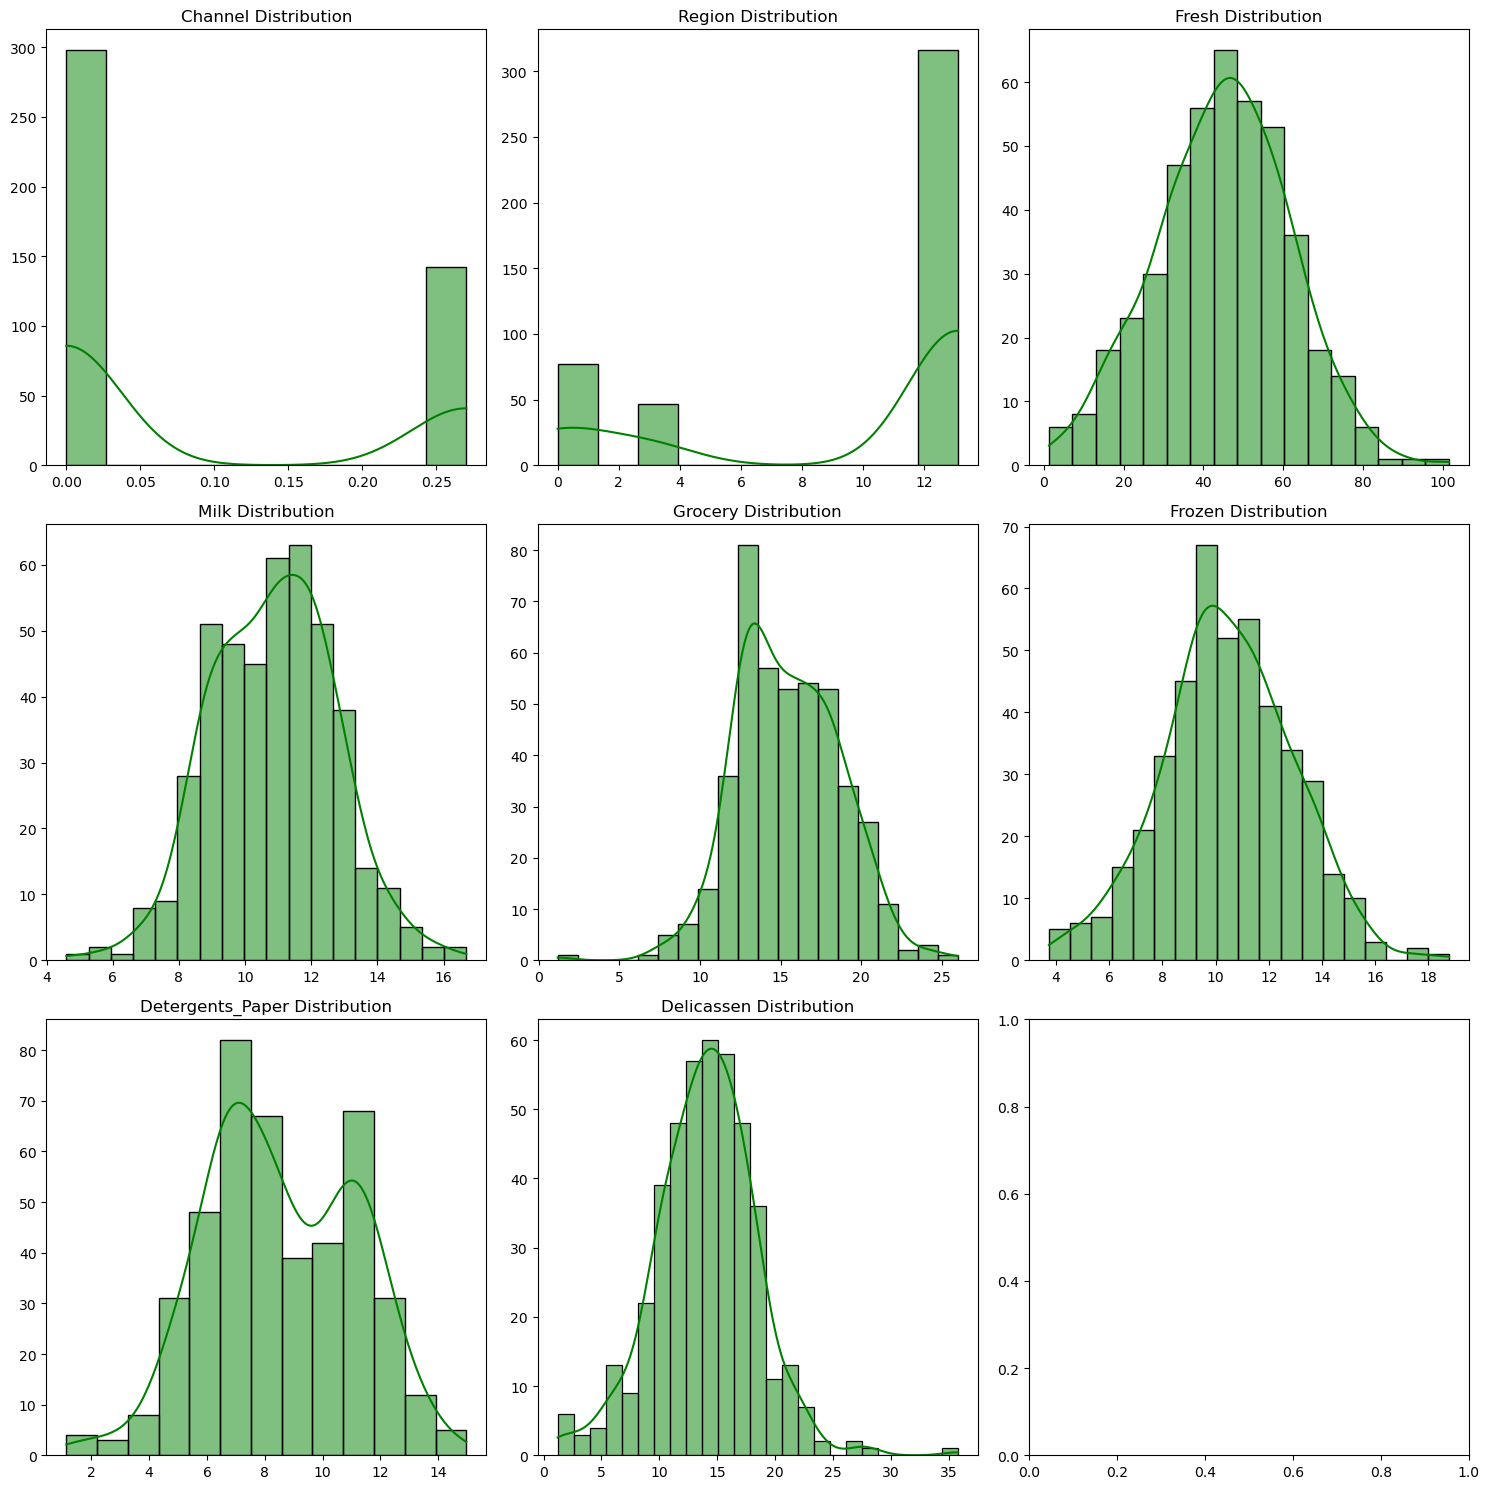

In [555]:
#recheck the distributions
#iteratively check the distribution of each variable using a histogram after imputation
cols = data.columns
#get number of rows with 2 plots / column
num_cols = 3
num_rows = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, col in enumerate(cols):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data[col], ax=ax, kde=True, color='Green')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('')  # Remove y-axis label

plt.tight_layout()
plt.show()

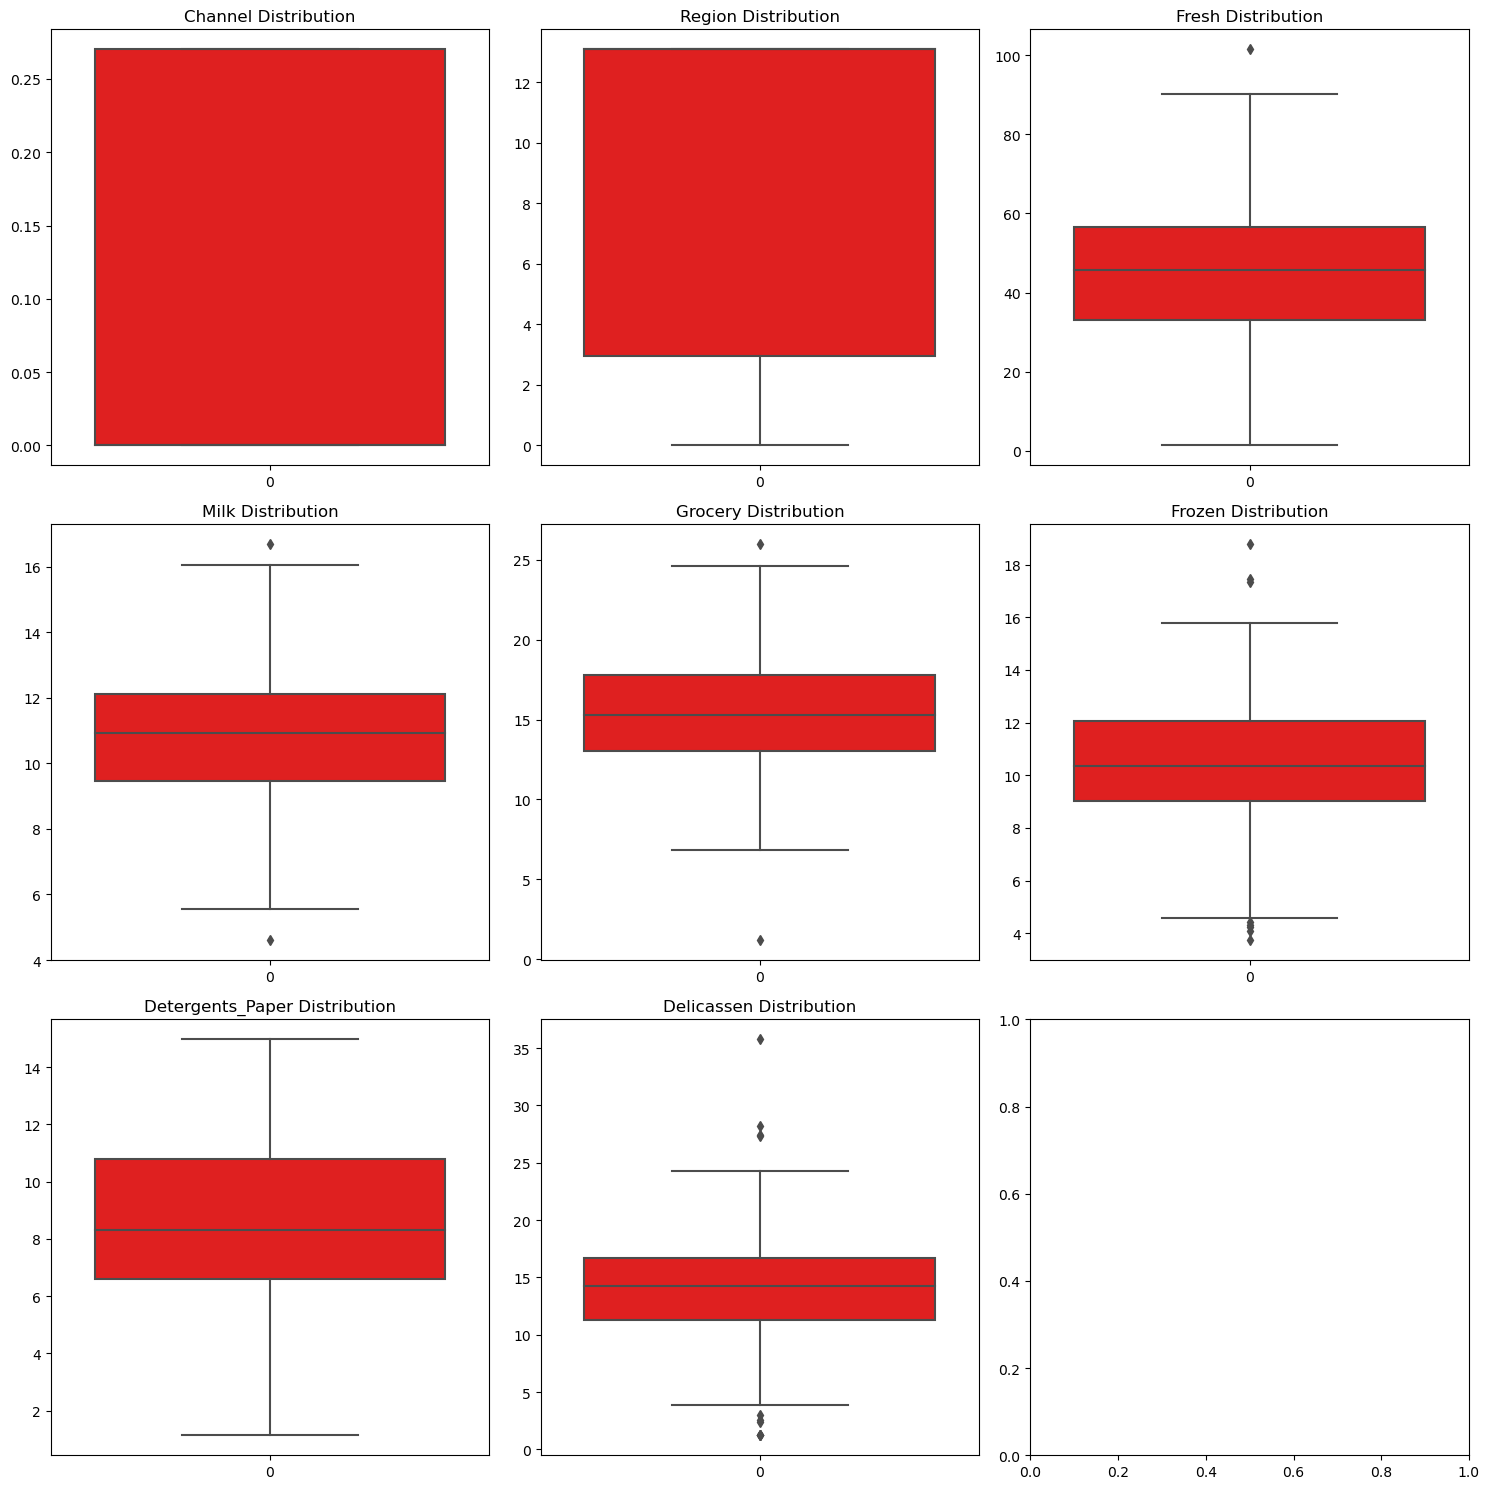

In [556]:
#check for outliers
#iteratively check for outliers of each variable using a histogram after imputation
cols = data.columns
#get number of rows with 2 plots / column
num_cols = 3
num_rows = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, col in enumerate(cols):
    ax = axes[i // num_cols, i % num_cols]
    sns.boxplot(data[col], ax=ax, color='red')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('')  # Remove y-axis label

plt.tight_layout()
plt.show()

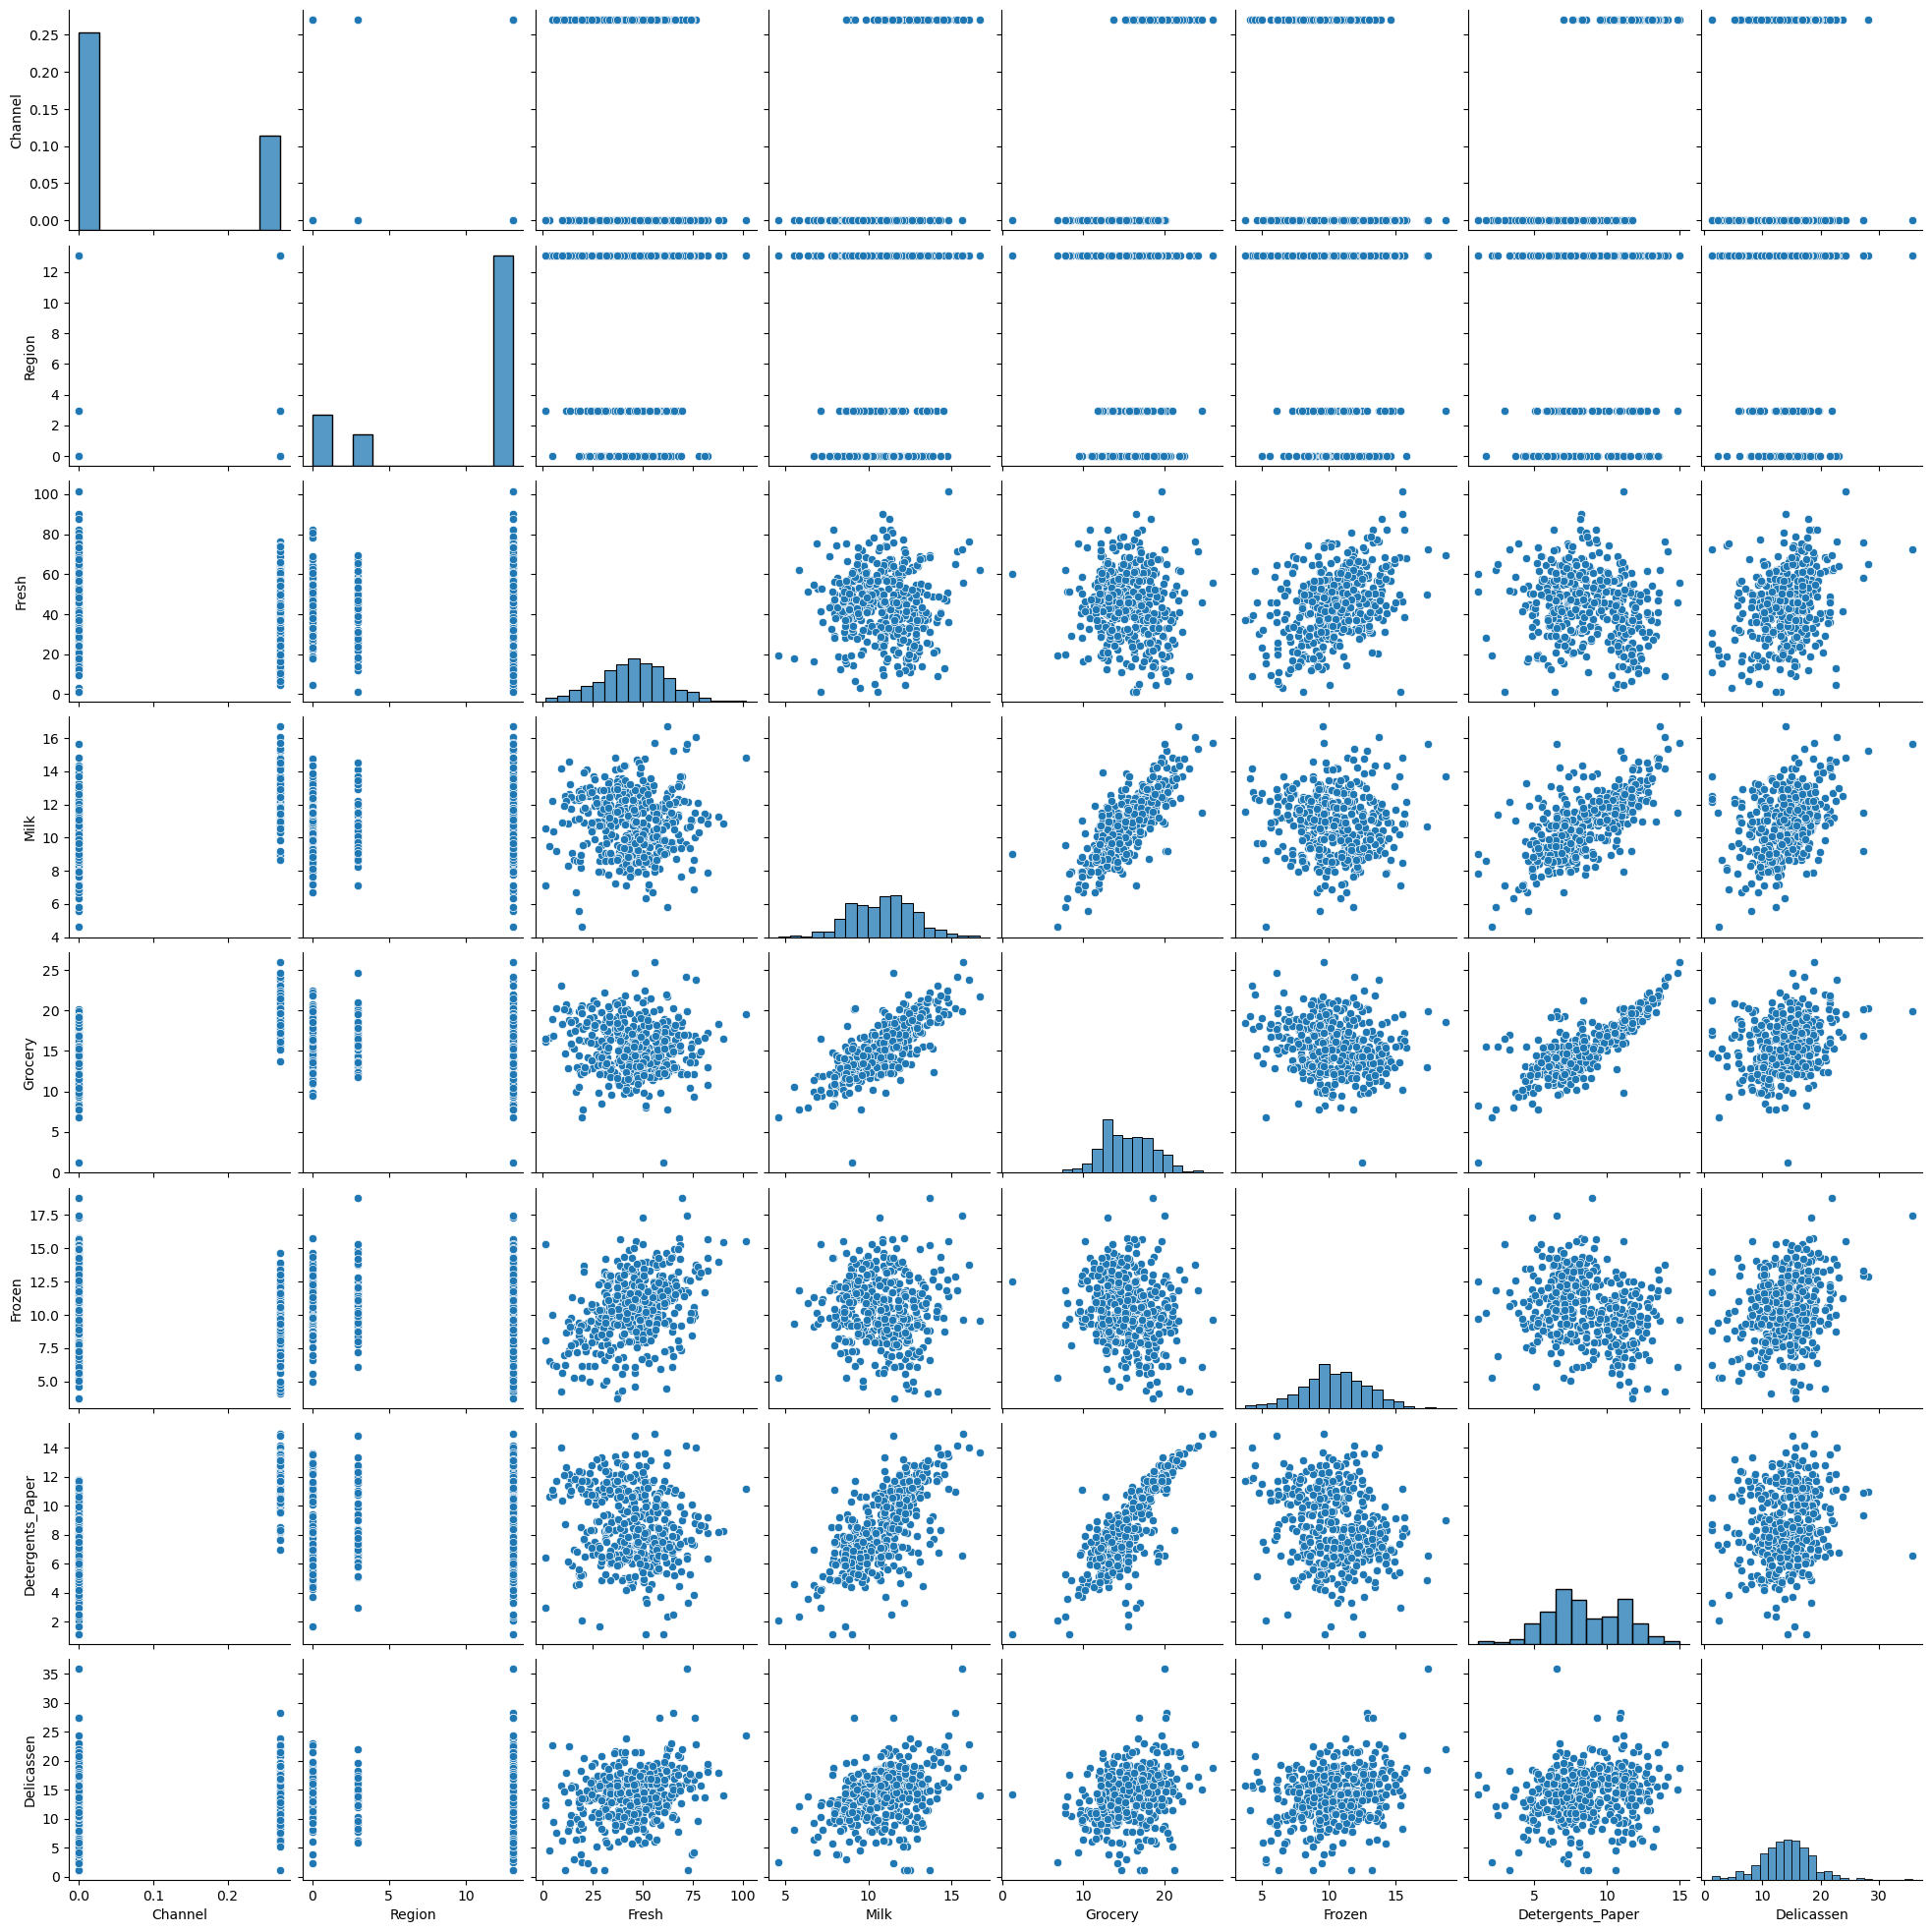

In [557]:
#create a pairplot of the data to see if there is any relationships
sns.pairplot(data)
plt.show()

In [558]:
#use Z-scoring to remove outliers
def z_score(column, threshold=2):
    """
        Assigns a Z-score for each value in the data frame and compares it with a threshold value
        
        All values less than the threshold are kept, all others are removed

        Uses the 2 standard deviations from mean as the threshold b/c a value with a Z score greater than 2

        Has an extremly small likelihood of occuring
        
    """
    z_score = (column - column.mean()) / column.std()
    return np.abs(z_score < threshold)

In [559]:
data_normalized = data[data.apply(z_score).all(axis=1)]

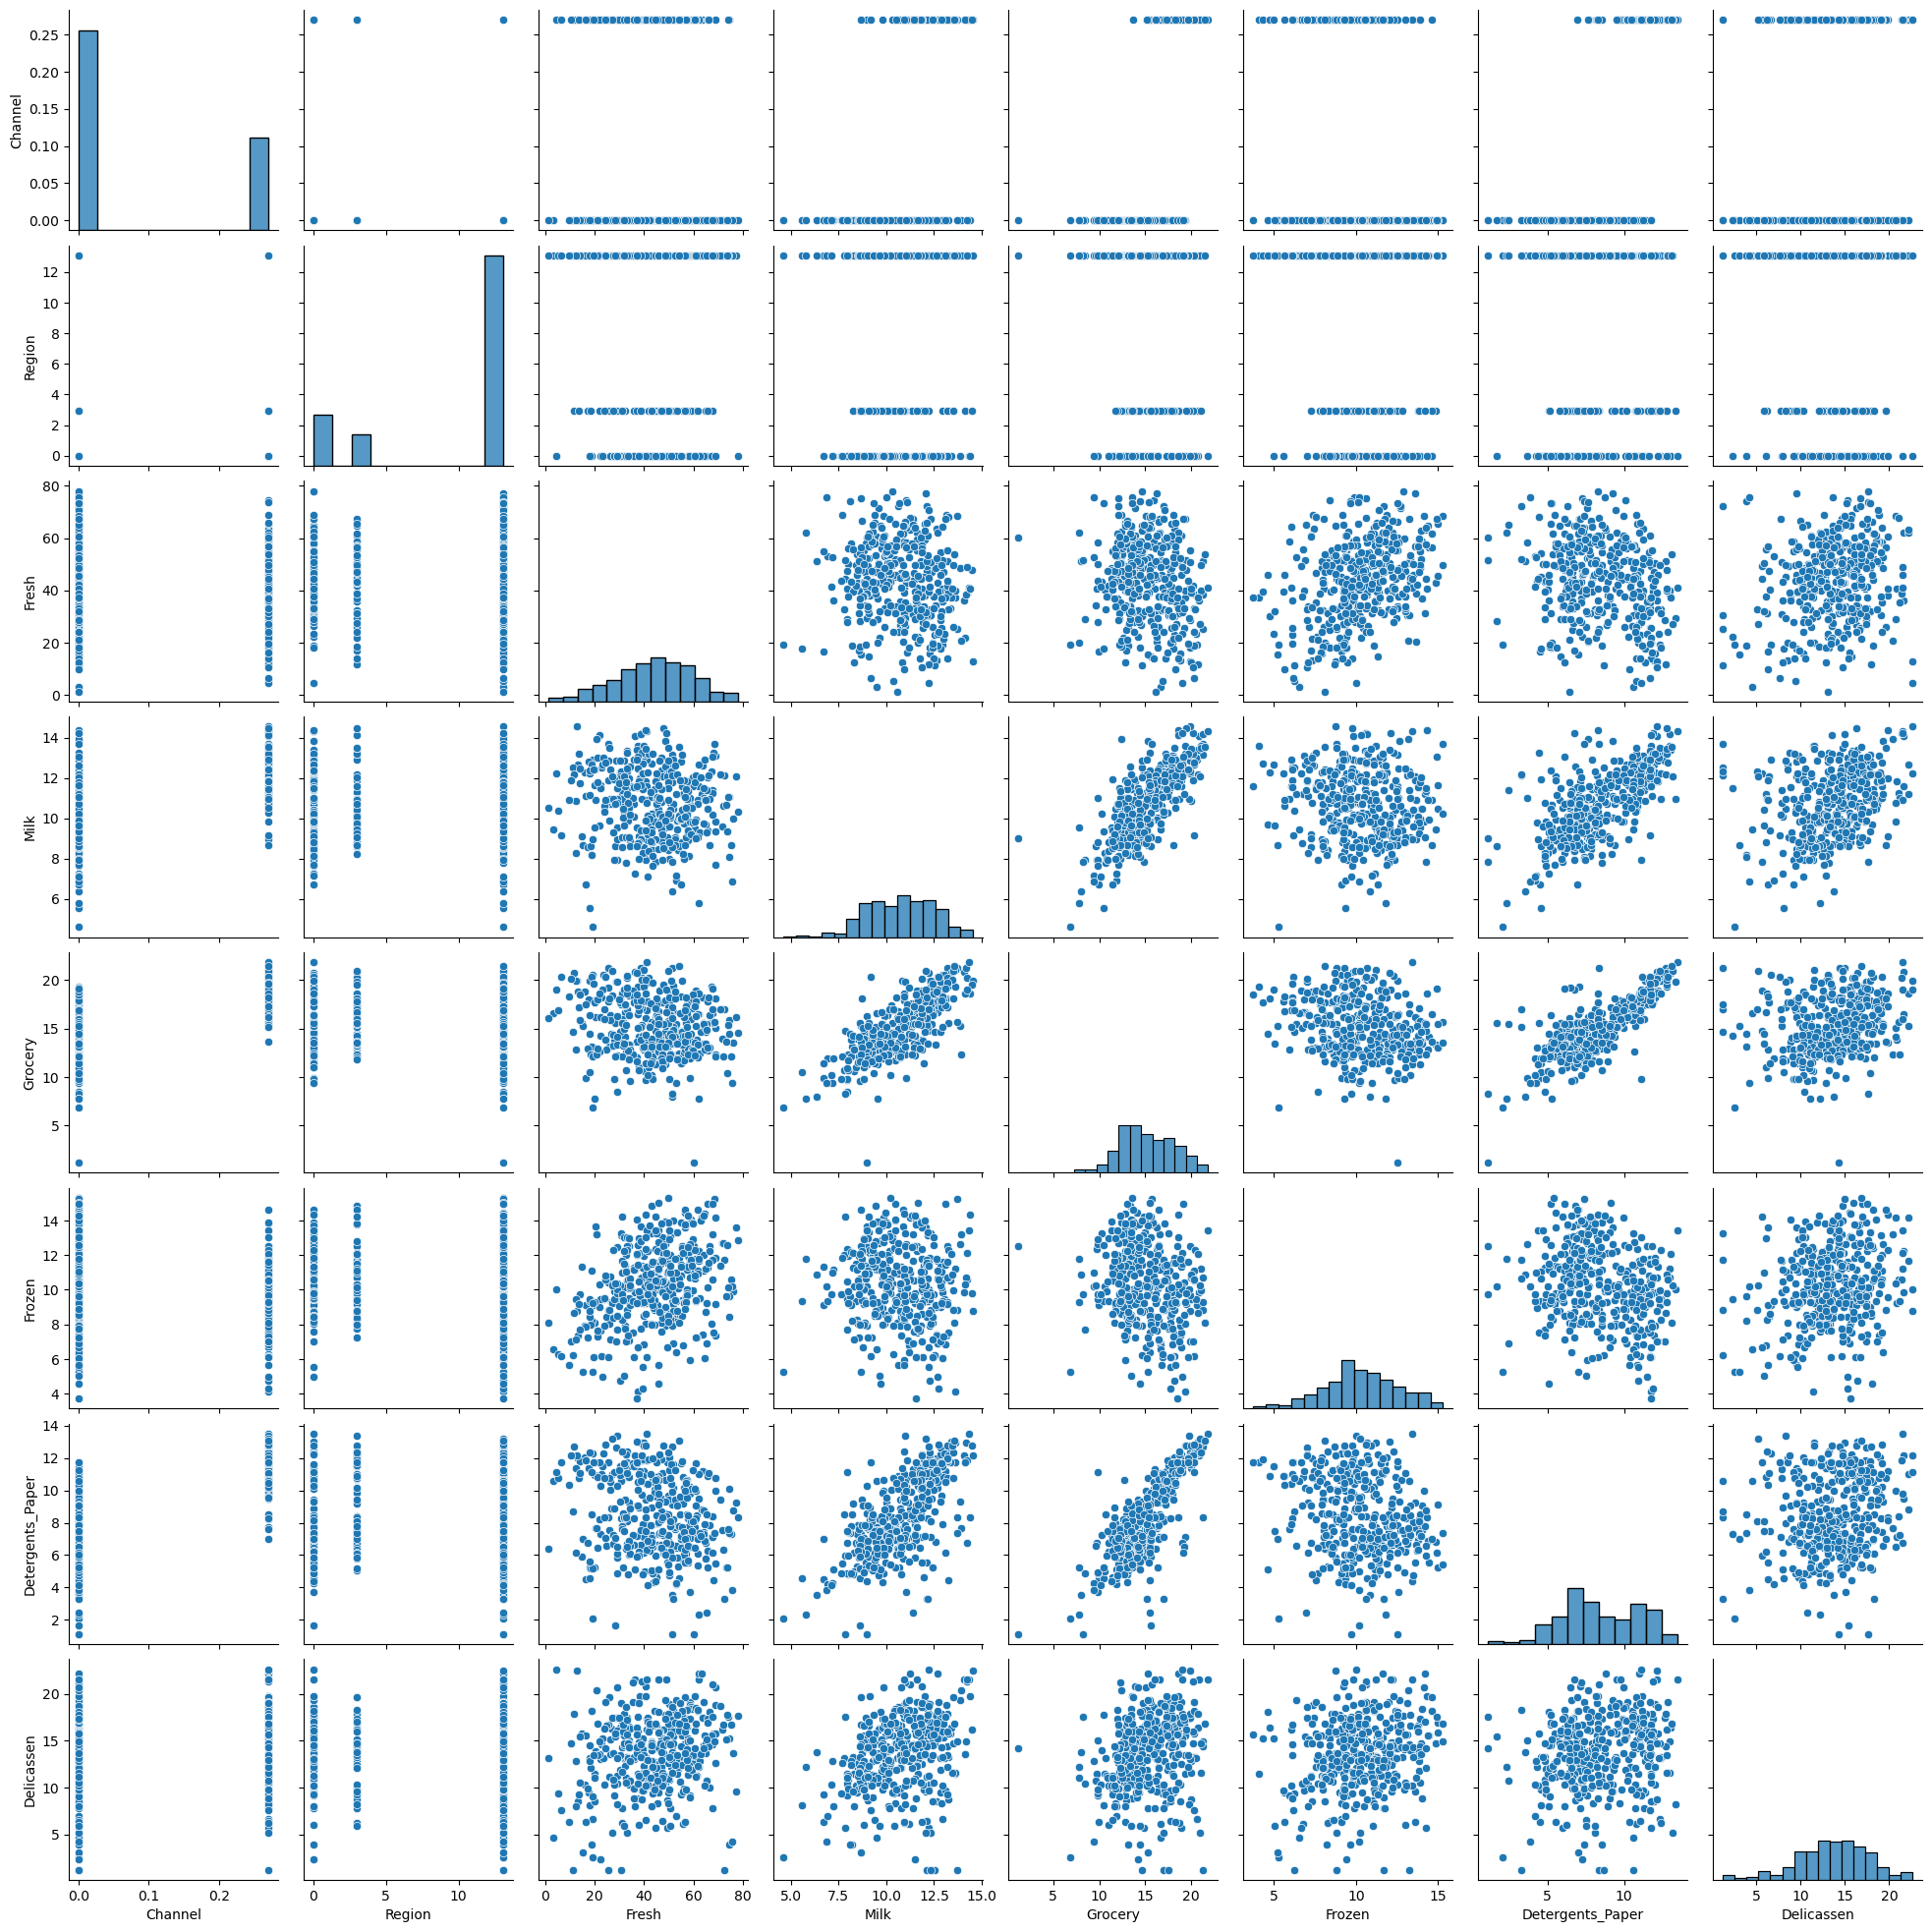

In [575]:
#pairplot of standardized data
sns.pairplot(data_normalized)
plt.show()

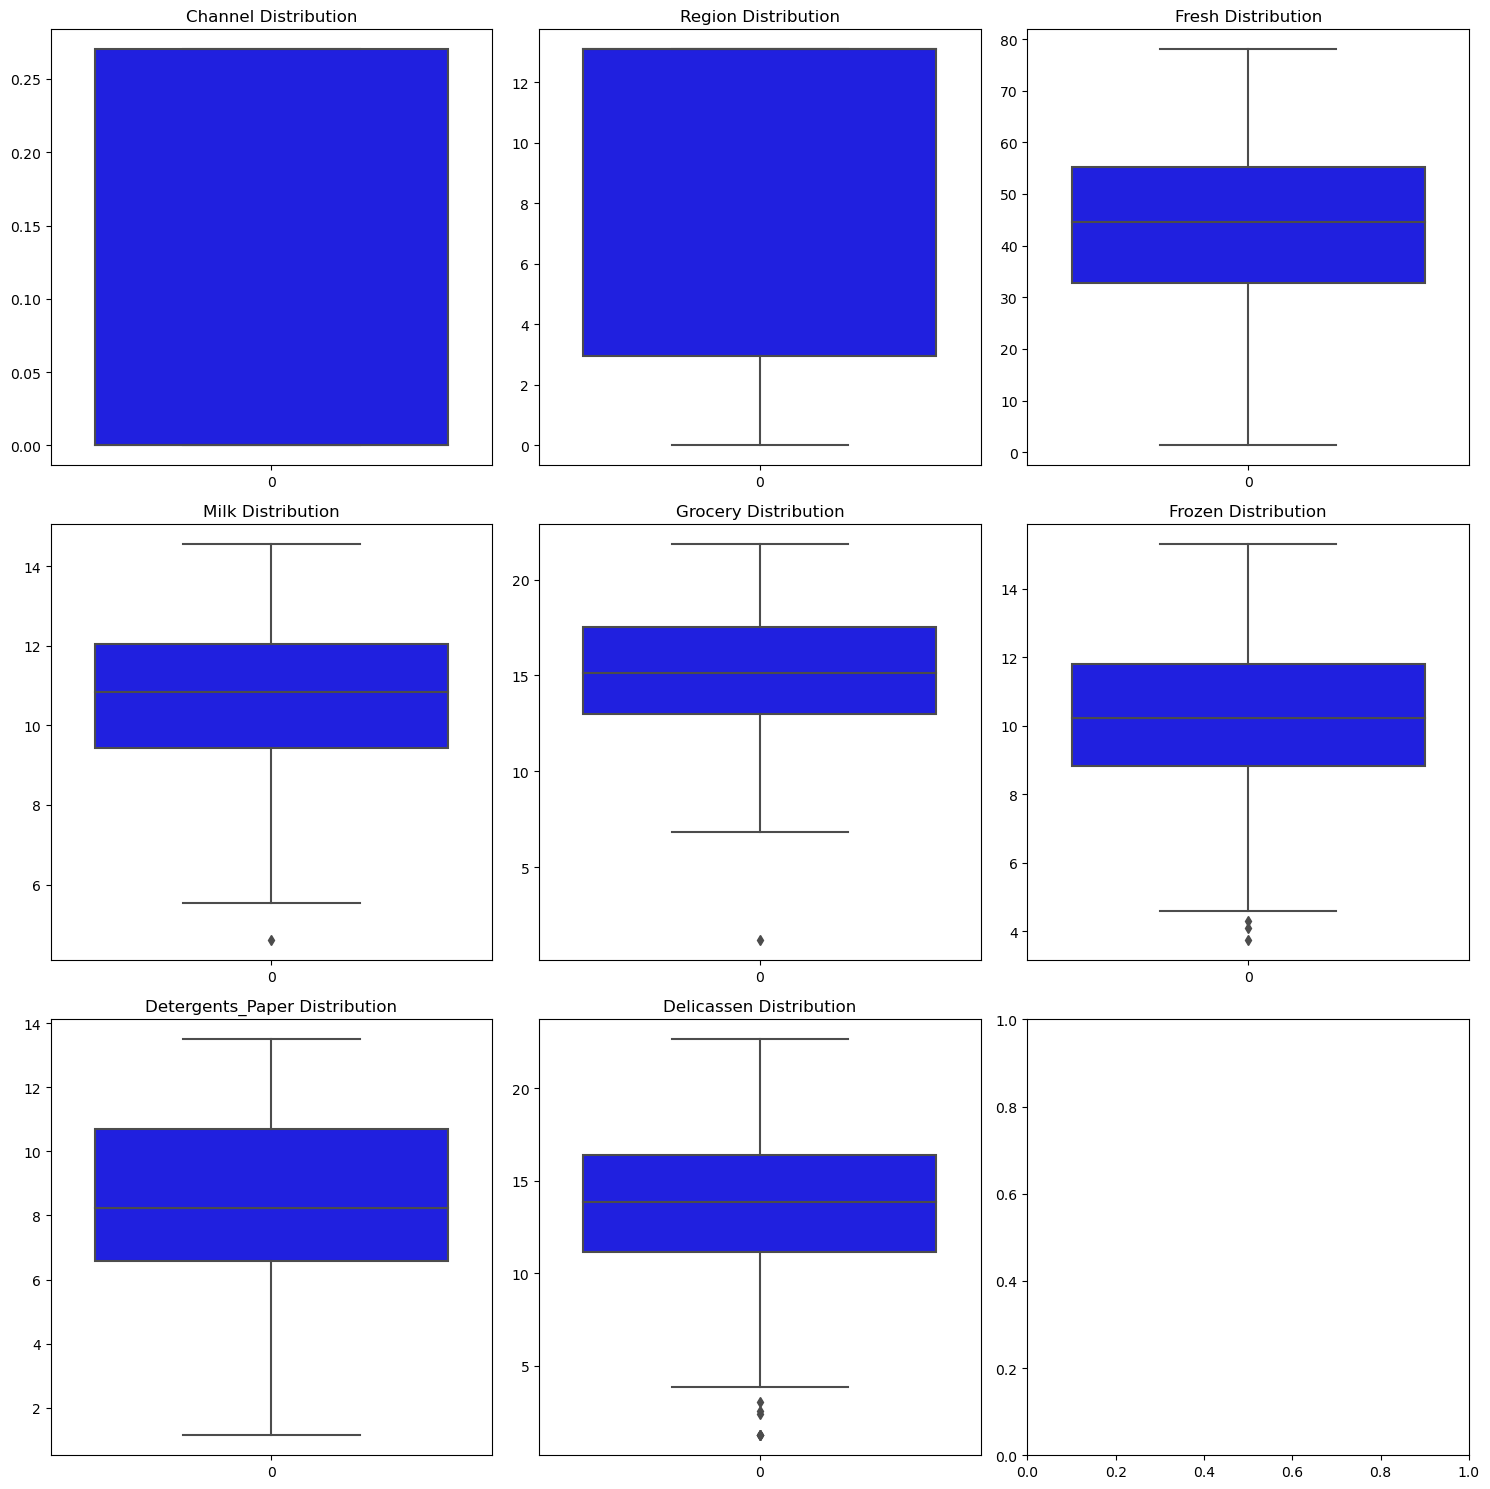

In [560]:
#check for outliers again
#iteratively check for outliers of each variable using a histogram after imputation
cols = data_normalized.columns
#get number of rows with 2 plots / column
num_cols = 3
num_rows = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, col in enumerate(cols):
    ax = axes[i // num_cols, i % num_cols]
    sns.boxplot(data_normalized[col], ax=ax, color='Blue')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('')  # Remove y-axis label

plt.tight_layout()
plt.show()

In [561]:
#scale the data
scaler = RobustScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_normalized), columns=data_normalized.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,0.0,0.323553,0.696262,0.345392,-1.124263,0.469022,0.314273
1,1.0,0.0,-0.067331,0.707451,0.511391,0.140715,0.551856,0.534451
2,0.0,0.0,0.357220,-0.681361,-0.044742,1.041373,-0.155797,0.539833
3,1.0,0.0,0.783261,0.294645,0.311327,0.685595,0.309504,1.484038
4,1.0,0.0,0.116674,0.586386,0.082044,-0.472759,0.313390,0.376098


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

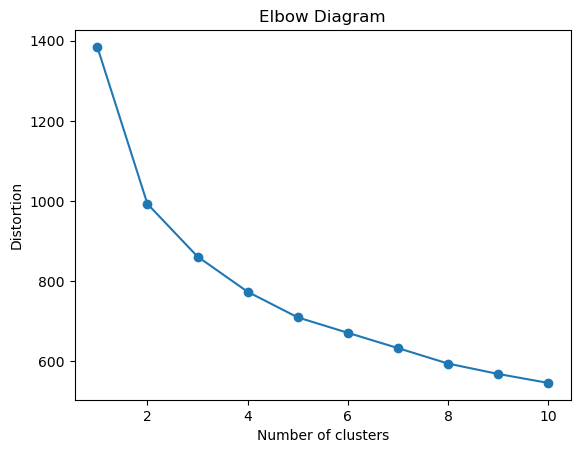

In [576]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for k in range(1, max_clusters +1):
        km = KMeans(n_clusters=k,
                    init='k-means++',
                    n_init=10,
                    random_state=42)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Diagram')
    plt.show() 

plot_distortion(data_scaled)

In [563]:
silhouette_scores = []
X = data_scaled.values
for k in range(2,11):
    km = KMeans(n_clusters=k,
            init='k-means++',
            n_init=10,
            random_state=42)
    kmeans_labels = km.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(X, kmeans_labels))

# Find the index of the K with the highest silhouette score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 because we started from K=2
print("Optimal number of clusters from Silhouette Score:", optimal_k)


Optimal number of clusters from Silhouette Score: 2


In [564]:

def generate_reference_data(data):
    """
    Generate random reference data with the same dimensions and range as the original data.

    Parameters:
        data (numpy array): The original dataset.

    Returns:
        reference_data (numpy array): Random reference data with the same dimensions as the original data.
    """
    num_samples, num_features = data.shape

    # Calculate the range for each feature in the original data
    feature_min = np.array(np.min(data, axis=0))
    feature_max = np.array(np.max(data, axis=0))

    # Generate random data points within the feature range
    reference_data = np.random.rand(num_samples, num_features)
    reference_data = reference_data * (feature_max - feature_min) + feature_min
    
    return reference_data

# Assuming 'data' is your original dataset (numpy array or pandas DataFrame)
reference_data = generate_reference_data(data)

In [565]:
gap_statistics = []
for k in range(2,11):
    km = KMeans(n_clusters=k,
                init='k-means++',
                n_init=10,
                random_state=42)
    kmeans_labels = km.fit(data_scaled)
    inertia = km.inertia_

    #Get the K-means on reference data
    reference_kmeans = KMeans(n_clusters=k,             
                              init='k-means++',
                              n_init=10,
                              random_state=42)
    reference_kmeans.fit(reference_data)
    reference_inertia = reference_kmeans.inertia_

    gap_statistics.append(np.log(reference_inertia) - np.log(inertia))

# Find the index of the K with the largest gap statistic
optimal_k = np.argmax(gap_statistics) + 2  # Add 2 because we started from K=2
print("Optimal number of clusters (Gap Statistic):", optimal_k)

Optimal number of clusters (Gap Statistic): 2


In [566]:
#create the model with the optimal clusters
kmeans_model = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
data_scaled['Clusters'] = kmeans_model.fit_predict(data_scaled)

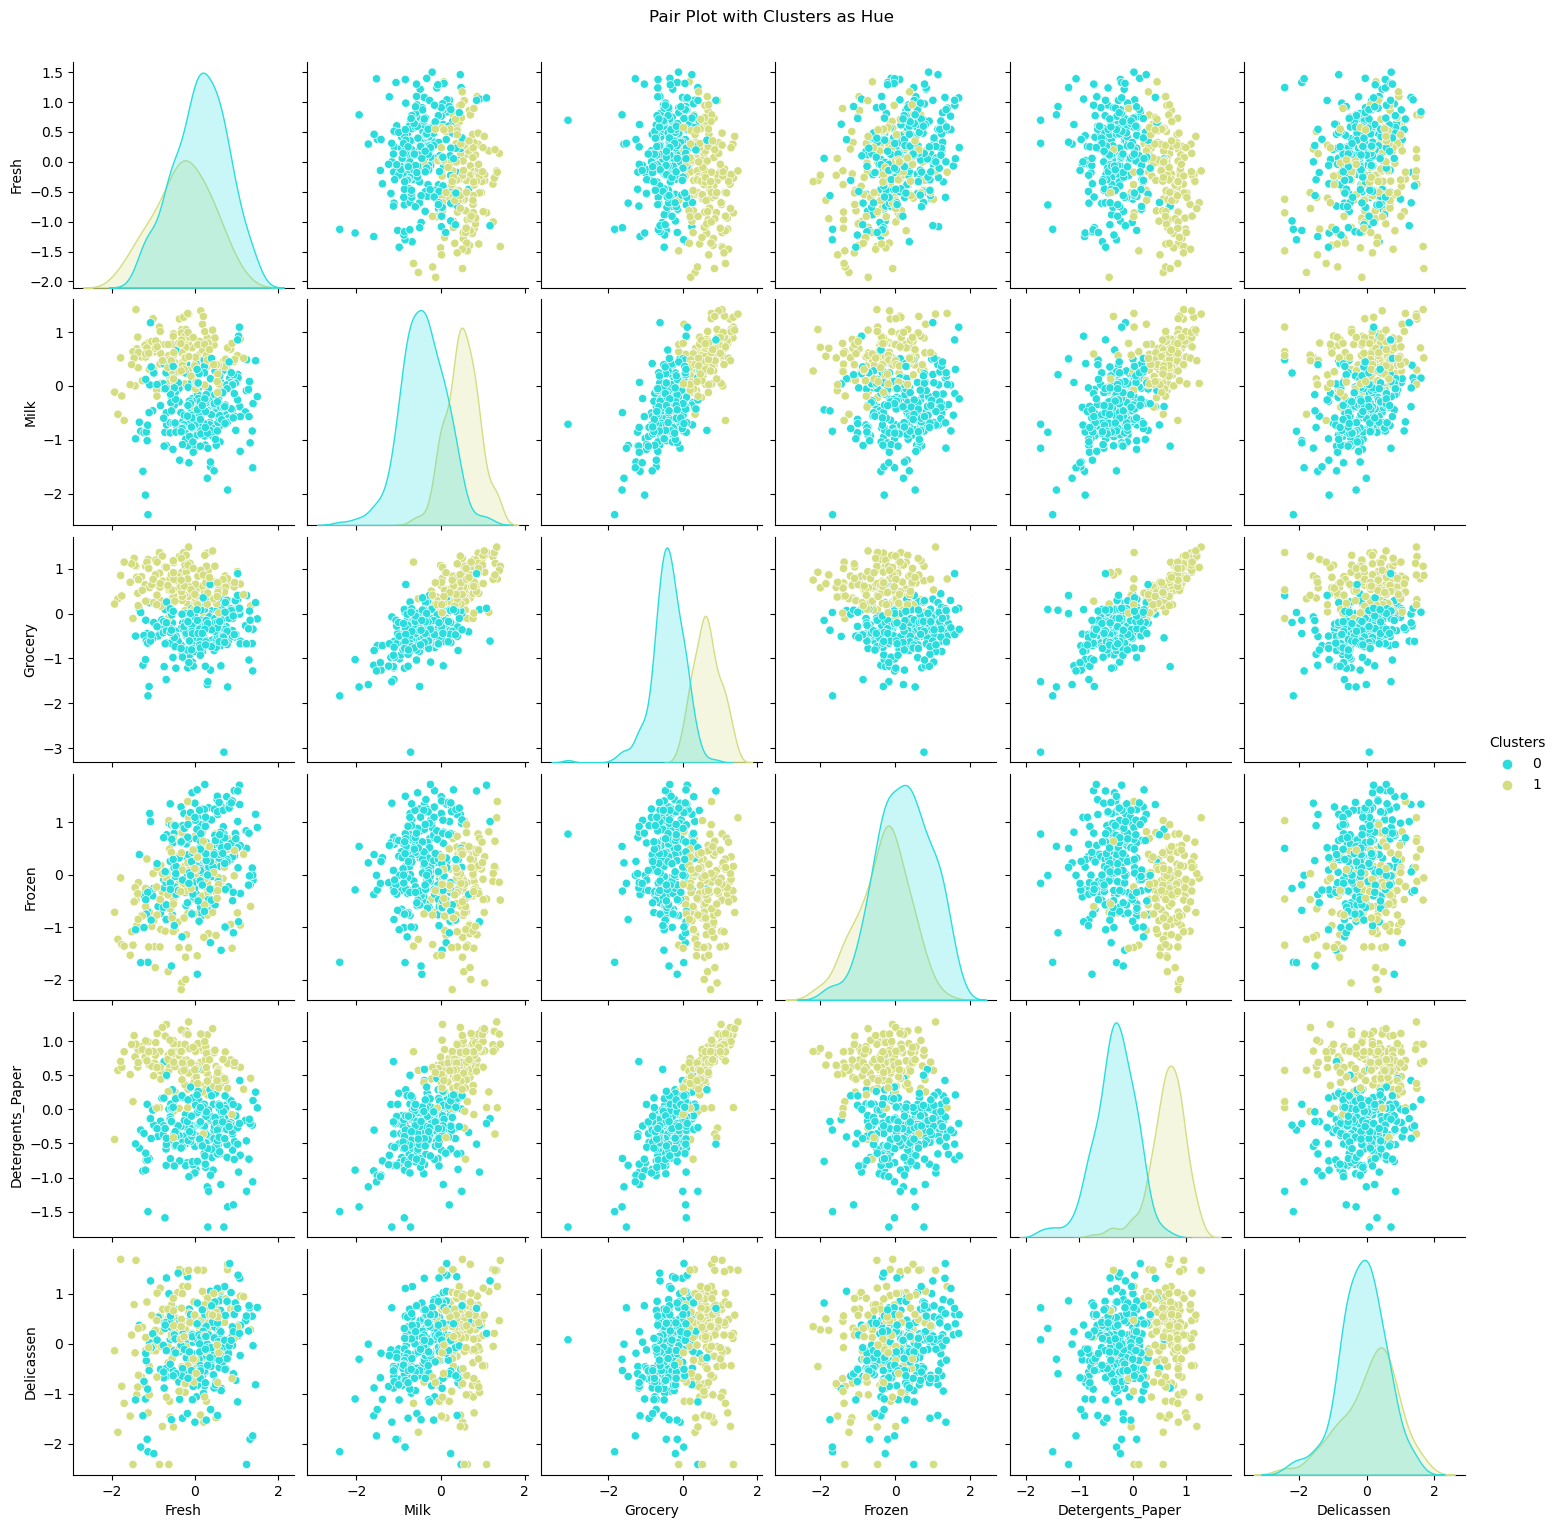

In [567]:
#pairplot to show the clusters for all of the different features
data_graph = data_scaled.drop(columns=['Region', 'Channel'])
sns.pairplot(data=data_graph, hue='Clusters', palette='rainbow')
plt.suptitle('Pair Plot with Clusters as Hue', y=1.02)
plt.show()

In [568]:
data_scaled = data_scaled.drop(columns=['Clusters'])

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [569]:
agg_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster_labels_agg = agg_cluster.fit_predict(data_scaled)


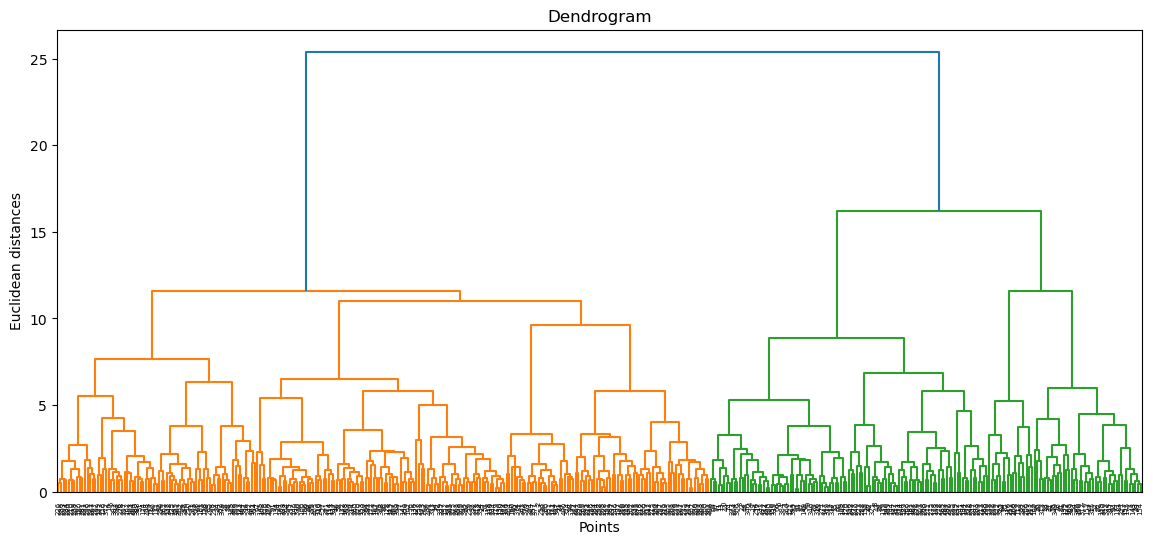

In [570]:
# define plot_dendrogram function
def plot_dendrogram(X, method='ward'):
    plt.figure(figsize=(14, 6))  # Set a wider figure size (12 inches wide, 6 inches tall)
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

plot_dendrogram(data_scaled)

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

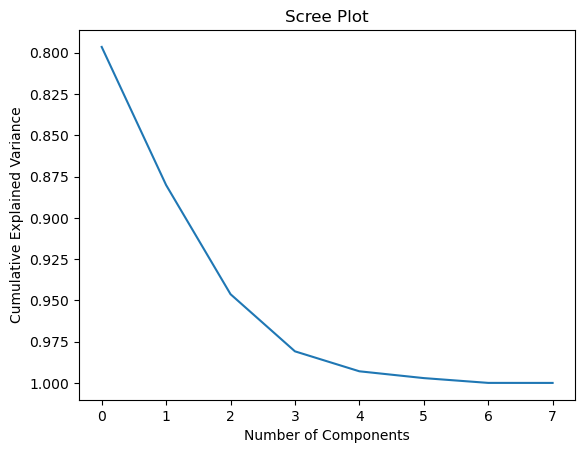

In [571]:
#scree plot to get the ideal number of components
pca = PCA()
pca.fit(data)
explained_variance = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')

#invert the axis
plt.gca().invert_yaxis()

plt.show()

In [572]:
#calculate the cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
percentage_explained_variance = explained_variance*100


table_data = {
    'Percentage Explained Variance (%)': percentage_explained_variance,
    'Cumulative Explained Variance (%)': cumulative_explained_variance * 100,
}

df = pd.DataFrame(table_data, index=[f'Component {i}' for i in range(1, len(cumulative_explained_variance) + 1)])
df

,Percentage Explained Variance (%),Cumulative Explained Variance (%)
Component 1,79.646222,79.646222
Component 2,8.367752,88.013974
Component 3,6.611339,94.625313
Component 4,3.461448,98.086761
Component 5,1.208817,99.295577
Component 6,0.412290,99.707867
Component 7,0.290274,99.998142
Component 8,0.001858,100.000000


In [574]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(data_scaled)

loadings = pca.components_

# Assuming you have feature names in a list called 'feature_names'
for component_num, loading_vector in enumerate(loadings):
    print(f"Principal Component {component_num + 1} Loadings:")
    
    # Sort the features based on their absolute loading values
    sorted_indices = np.argsort(np.abs(loading_vector))[::-1]
    
    for feature_num in sorted_indices:
        feature_name = data_scaled.columns[feature_num]
        loading_value = loading_vector[feature_num]
        print(f"{feature_name}: {np.abs(loading_value):.3f}")
    print('--------------------------------')
    


Principal Component 1 Loadings:
Grocery: 0.536
Milk: 0.495
Detergents_Paper: 0.475
Channel: 0.322
Frozen: 0.232
Fresh: 0.212
Delicassen: 0.199
Region: 0.011
--------------------------------
Principal Component 2 Loadings:
Delicassen: 0.623
Frozen: 0.599
Fresh: 0.468
Milk: 0.172
Grocery: 0.057
Region: 0.034
Detergents_Paper: 0.004
Channel: 0.001
--------------------------------
Principal Component 3 Loadings:
Delicassen: 0.670
Frozen: 0.633
Region: 0.226
Detergents_Paper: 0.205
Grocery: 0.191
Milk: 0.106
Channel: 0.100
Fresh: 0.006
--------------------------------


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- Based on the results of the K-means and hierarchical clustering, the optimal number of clusters for the model was 2. The K value was calculated using a silohuette calculation and gap statistics. Additionally the optimal number of components that explaned over 90% of the variation in data was 3 as seen in the scree plot.
- 94.6% of the variation in the data is explained by the first 3 components, thus a model with 3 components distilled by PCA can explain nearly all of the variation of the 8 dimensional model in only 3 dimensions. While it is less accurate, just over 88% of the variation in the data can be explained with just two components which means that 88% of the data can be explained by PCA decomposed data in just gtwo dimensions rather than 8.
- The most influential features in the PCA for component 1: was Grocery, with a Loading of 0.536 and for component 2: Delicassen with a Loading of 0.623 and for component 3: Delicassen with a loading of 0.670. Interestingly the 3 most influential features were the same for components 2 and 3 which suggests that these 3 features (Delicassen, Fronzen, and Region) contribute most to the variation in those components 
- Detergents_Paper and gerocery have a strong positive correlation of 0.92 which suggests that clients of the wholesale distributor anual spending on both grocery and detergents_paper products is highly related.